In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_36168\4056416768.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


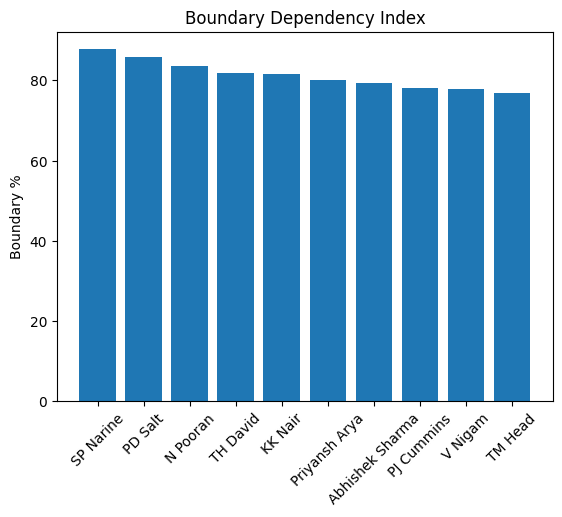

In [2]:
query = """
SELECT
    p.player_name,
    SUM(bd.runs_batter) AS total_runs,
    SUM(CASE WHEN bd.is_four = 1 THEN 4 ELSE 0 END +
        CASE WHEN bd.is_six = 1 THEN 6 ELSE 0 END) AS boundary_runs
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING total_runs >= 50
"""
df = pd.read_sql(query, conn)

df["boundary_pct"] = (df["boundary_runs"] / df["total_runs"]) * 100

df = df.sort_values("boundary_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["player_name"], df["boundary_pct"])
plt.xticks(rotation=45)
plt.ylabel("Boundary %")
plt.title("Boundary Dependency Index")
plt.show()


In [3]:
query = """
SELECT
    p.player_name AS batter,
    COUNT(DISTINCT bd.match_id) AS matches_played,
    COUNT(*) AS balls_faced,
    SUM(CASE WHEN bd.is_six = 1 THEN 1 ELSE 0 END) AS sixes
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING sixes > 0
ORDER BY sixes DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)

df["balls_per_six"] = df["balls_faced"] / df["sixes"]
df


C:\Users\hp\AppData\Local\Temp\ipykernel_36168\2414851816.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,matches_played,balls_faced,sixes,balls_per_six
0,N Pooran,7,182,31.0,5.870968
1,SS Iyer,7,140,20.0,7.000000
2,Priyansh Arya,7,116,17.0,6.823529
3,MR Marsh,6,184,17.0,10.823529
4,AM Rahane,7,155,14.0,11.071429
5,Aniket Verma,6,89,14.0,6.357143
6,B Sai Sudharsan,7,254,14.0,18.142857
7,KL Rahul,6,176,13.0,13.538462
8,YBK Jaiswal,7,177,13.0,13.615385
9,PD Salt,7,120,13.0,9.230769


In [4]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS fours
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_36168\1300005030.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,fours
0,B Sai Sudharsan,36
1,TM Head,33
2,JC Buttler,32
3,Abhishek Sharma,31
4,MR Marsh,30
5,N Pooran,28
6,SA Yadav,27
7,PD Salt,26
8,RD Rickelton,24
9,SV Samson,23
